Convolutional Neural Network (CNN) is a neural network designed to process data with a similar grid structure. For example, time series data (a one-dimensional grid formed by regular sampling on the time axis) and image data (a two-dimensional pixel grid). Therefore, it is widely used in various occasions such as image recognition and speech recognition. In image recognition competitions, methods based on deep learning are almost all based on CNN.

# 1. Overall structure

In the neural network introduced earlier, all neurons in adjacent layers are connected, which is called a Fully Connected layer or Affine layer. The fully connected layer is followed by the activation function ReLU layer (or Sigmoid layer). Here, 4 layers of "Affine-ReLU" combinations are stacked, then the fifth layer is a fully connected layer, and finally the Softmax layer outputs the final classification result.

![img](images/chapter13/fully_connected.png)

Convolution and Pooling layers have been added to CNN. The layer connection order of a typical CNN is "Convolution-ReLU-(Pooling)" (Pooling layer is sometimes omitted).

![img](images/chapter13/CNN.png)

# 2. Convolutional layer

## 2.1 Problems with the fully connected layer

The shape of the input data is "ignored" by the fully connected layer. For example, when inputting image data to a fully connected layer, the 3-dimensional image data (width, height, and number of channels) needs to be flattened into 1-dimensional data. In fact, in the example of the MNIST data set used earlier, the input image is a (1, 28, 28) shape with 1 channel, 28 pixels high, and 28 pixels long, but it is arranged in 1 column in the form of 784 data Input to the fully connected layer.

The three-dimensional shape of the image contains important spatial information. For example, spatially adjacent pixels have similar values, each channel of RBG is closely related, and there is no correlation between pixels that are far apart, etc. There may be essential patterns that are worth extracting hidden in the 3D shape. However, because the fully connected layer ignores the shape and treats all the input data as the same neuron (neurons of the same dimension), the information related to the shape cannot be used.

The convolutional layer can keep the data shape unchanged. When the input data is an image, the convolutional layer will receive the input data in the form of 3-dimensional data, and also output to the next layer in the form of 3-dimensional data. Therefore, in CNN, data with shapes such as images can be correctly understood.

In CNN, the output data of the convolutional layer is called a feature map.

## 2.2 Convolution operation

For input data, the convolution operation slides the window of the convolution kernel (or filter) at certain intervals and applies it. Multiply the elements of the convolution kernel at each position and the corresponding elements of the input, and then sum them (sometimes this calculation is called the multiplication accumulation operation). Then, save this result to the corresponding location of the output. Repeat this process at all positions, and you can get the output of the convolution operation. If a two-dimensional data is defined as $I$ and a two-dimensional convolution kernel is defined as $K$, then  

$$ S(i,j) = (I *K)(i,j) = \sum_m \sum_n I(i+m,j+n)K(m,n)$$

Assuming that (height, width) is used to represent the shape of the data and the convolution kernel, the input data size in the following figure is (5, 5), the output data size is (3, 3), and the convolution kernel size is (3, 3) , its value is

$$ \Bigg(
   \begin{matrix}
   0 & 1 & 2 \\
   2 & 2 & 0 \\
   0 & 1 & 2
  \end{matrix} \Bigg)
$$

![img](images/chapter13/numerical_no_padding_no_strides.gif)

Let $i$ be the input data size, $k$ be the convolution kernel size, and $o$ be the output data size, there is a relationship:

$$ o = (i - k) + 1 $$

When the number of convolutional layers increases, the spatial dimension of the network will eventually be reduced to 1×1. In this case, it is impossible for the added layers to perform meaningful convolution.

In a fully connected neural network, in addition to the weight parameter, there is also a bias. In CNN, the parameters of the convolution kernel correspond to the previous weights. Moreover, there is also a bias in CNN, and the bias is added to all elements to which the convolution kernel is applied.

## 2.3 Padding

Before processing the convolutional layer, it is sometimes necessary to fill in fixed data (usually 0) around the input data. This is called padding, which is often used in convolution operations. In the figure below, padding of amplitude 1 is applied to input data of size (4, 4). By filling, the input data of size (4, 4) becomes the shape of (6, 6). Then apply a convolution kernel of size (3, 3) to generate output data of size (4, 4).

![img](images/chapter13/padding.png)

Let $p$ be the filling range, it is related by

$$ o = (i - k) + 2p + 1 $$

In the example in the figure below, $i=5, k =4, p =2$, so $o=6$

![img](images/chapter13/arbitrary_padding_no_strides.gif)

### Same Padding

一类特殊的填充作为称之为 same padding，即使得输出数据尺寸等于输入数据尺寸。令卷积核尺寸 $k$ 为奇数（$k = 2n+1$），填充幅度 $p = \lfloor \frac{k}{2} \rfloor= n$，则有
A special type of padding is called same padding, which makes the output data size equal to the input data size. Let the size of the convolution kernel $k$ be an odd number （$k = 2n+1$), and the filling range $p = \lfloor \frac{k}{2} \rfloor= n$, then

$$ o = (i - 2n - 1)+2n+1 = i $$

In the example in the figure below, $i=o=5, k = 3, p=1$

![img](images/chapter13/same_padding_no_strides.gif)

In this case, as long as the hardware supports it, the network can contain any number of convolutional layers, because the convolution operation does not change the structure of the next layer. However, the part close to the boundary of the input data has less influence on the output data than the middle part. This may cause a certain degree of underrepresentation of the boundary pixels.

### Full Padding

Another special type of padding is called full padding, even if the convolution kernel and the data just intersect, it starts to convolve, so the padding amplitude is $p = k-1$,

$$o = (i - k)+2(k-1)+1 = i+k-1$$

In the example in the figure below, $i=5, k = 3, p=2$, so $o=6$
![img](images/chapter13/full_padding_no_strides.gif)

It performs enough zero padding so that each pixel has been visited exactly $k$ times in each direction.

## 2.4 Stride

The position interval at which the convolution kernel is applied is called **stride**. In the previous example, the stride is all 1. If the stride is set to 2, as shown in the figure below, the interval of the window where the convolution kernel is applied becomes 2 elements.

![img](images/chapter13/stride.png)

Let $i$ be the input data size, $p$ be the padding width, $k$ be the size of the convolution kernel, $s$ be the stride size, and $o$ be the output data size, then:

$$ o = \lfloor \frac{i + 2p -k}{s} \rfloor + 1 $$

In the example in the figure below, $i=5, k=3, s=2, p=1$, so $o=3$

![img](images/chapter13/padding_strides.gif)

## 2.5 Convolution operation of 3D data

The image is three-dimensional data, and the order is (channel, height, width) when expressed as a multidimensional array. For example, the shape of the data with the number of channels C, height H, and length W can be written as $(C, H, W)$. When performing convolution operations, in addition to the height and width directions, the channel direction needs to be processed. When there are multiple feature maps in the channel direction, the convolution operation of the input data and the convolution kernel is performed according to the channel, and the results are added to obtain the output. It should be noted that the input data and the number of channels of the convolution kernel must be the same value.

![img](images/chapter13/3D_conv_0.png)

Here, take the data of 3 channels as an example, the input data size is (3, 5, 5), the convolution kernel size is (3, 3, 3), the padding amplitude is 0, the stride is 1, and the output data size is ( twenty two).

![img](images/chapter13/3D_conv_1.png)

The step-by-step calculation sequence is as follows：

![img](images/chapter13/3D_conv_2.png)

If you want to have the output of multiple convolution operations in the channel direction, you need to use multiple convolution kernels. As shown in the figure below, by applying $FN$ convolution kernels, $FN$ output feature maps are also generated. If these $FN$ feature maps are collected together, a data body with the shape $(FN, OH,OW)$ is obtained.

![img](images/chapter13/multi_channel_conv.png)

Further improve the convolution operation including the offset addition operation, as shown in the figure below. The shape of the output result of the convolution kernel is $(FN, OH, OW)$, and the shape of the offset is $(FN, 1, 1)$. When these two data are added together, thanks to the broadcast function of NumPy, the same offset value is added per channel.

![img](images/chapter13/multi_channel_conv_with_bias.png)

## 2.6 Batch processing

The previous implementation of the fully connected neural network corresponds to batch processing, and the SDG algorithm corresponding to mini-batch can be realized through batch processing. Convolution operations also support batch processing. For this, it is necessary to save the data passed between the layers as four-dimensional data, and save the data in the order of (batch_num, channel, height, width).

![img](images/chapter13/batch_conv.png)

## 2.7 Motivation for convolutional layers

Convolution operations use three important ideas to help improve the deep learning system: **sparse connectivity**, **parameter sharing**, and **equivariant representations**.

### 2.7.1 Sparse connectivity

The fully connected layer of the traditional neural network uses matrix multiplication to establish the connection between input and output. Among them, each individual parameter in the parameter matrix describes the interaction between an input unit and an output unit. This means that every output unit interacts with every input unit. However, convolutional networks are characterized by sparse connections (also known as sparse weights). This is achieved by making the size of the core much smaller than the size of the input data.

For example, if there are $m$ inputs and $n$ outputs, then the matrix multiplication of the fully connected layer requires $m×n$ parameters and the time complexity of the corresponding algorithm is $O(m×n)$. If we limit the number of connections that each output has to $k$, then the sparse connection method only needs $k×n$ parameters and a running time of $O(k×n)$.In many practical applications, you only need to keep $k$ several orders of magnitude smaller than $m$ to achieve good performance in machine learning tasks.

![img](images/chapter13/sparse_connectivity.png)

In a deep convolutional network, units in the deep layers of the network may interact indirectly with most of the input, which allows the network to efficiently describe complex interactions of multiple variables by describing only the cornerstones of sparse connections. In the figure below, the gray area highlights the $g3$ neuron and its **receptive field**.

![img](images/chapter13/receptive_field.png)

### 2.7.2 Parameter sharing

Parameter sharing refers to using the same parameters in multiple functions of a model.

In traditional neural networks, when calculating the output of a layer, each element of the weight matrix is used only once, and it is never used again when it is multiplied by an element of the input.

In a convolutional neural network, every element of the kernel acts on every position of the input. The parameter sharing in the convolution operation ensures that we only need to learn one parameter set instead of learning a separate parameter set for each position. Although this does not change the running time of the forward propagation (still $O(k×n)$), it significantly reduces the storage requirement of the model to $k$ parameters, and $k$ is usually many orders of magnitude smaller than $m$. Therefore, convolution is greatly superior to dense matrix multiplication in terms of storage requirements and statistical efficiency.

In the upper part of the figure below, the single black arrow indicates the use of the middle element of the weight matrix in the fully connected model. This model does not use parameter sharing, so the parameters are only used once. In the convolution model, because of parameter sharing, this single parameter is used for all input positions.

![img](images/chapter13/parameter_sharing.png)

### 2.7.3 Equivariant representations

The special form of parameter sharing makes the neural network layer have the property of **equivariance** to translation. If a function satisfies the input change and the output changes this property in the same way, we say that it is equivariant. In particular, if the functions $f(x)$ and $g(x)$ satisfy $f(g(x))=g(f(x))$, we say that $f(x)$ is for transformation $ g$ is equivariant. For convolution, if $g$ is an arbitrary translation function of the input, then the convolution function is equivariant to $g$.

For example, let $I$ denote the brightness function of the image in integer coordinates, and $g$ denote the transformation function of the image function such that $I'=g(I)$, where the image function $I'$ satisfies $I'(x, y )=I(x-1,y)$. This function moves each pixel in $I$ one unit to the right. If we first perform this transformation on $I$ and then perform the convolution operation, the result obtained is the same as the result obtained by first convolving $I$ and then using the translation function $g$ on the output.

# 3. Pooling layer

The pooling function uses the overall statistical characteristics of adjacent outputs at a certain location to replace the output of the network at that location. For example, the Max Pooling function uses the maximum value in the adjacent rectangular area. Other commonly used pooling functions include the average value in adjacent rectangular areas (Average Pooling), L2 norm, and a weighted average function based on the distance from the center pixel.

Generally speaking, the pooling window size will be set to the same value as the stride. The following figure shows the processing sequence when the maximum pooling of 2 × 2 is carried out by step 2.

![img](images/chapter13/max_pooling.png)

## Characteristics of pooling layer

- Pooling only takes the maximum value (or average value) from the target area, so there are no parameters to learn.


- After pooling operation, the number of channels of input data and output data will not change.


- Robust to small position changes. No matter what kind of pooling function is used, when the input makes a small shift, most of the output after the pooling function will not change.

# 4. Implementation of Convolutional Layer and Pooling Layer

## 4.1 Implementation of Convolutional Layer

If the convolution operation is implemented normally, multiple layers of for loop statements need to be repeated, but there is a disadvantage that the use of for statements to process NumPy arrays is inefficient. Here, we do not use the for statement to implement the convolution operation, but use the convenient function im2col for simple implementation.

The **im2col** (image to column) function expands the input data to fit the convolution kernel (weight). After applying im2col to the three-dimensional input data, the data is converted into a two-dimensional matrix, as shown in the figure below.

![img](images/chapter13/im2col_3D.png)

After using im2col to expand the input data, you only need to expand the convolution kernel (weight) of the convolution layer into 1 column vertically, and calculate the product of these two matrices.

![img](images/chapter13/trans_kernel.png)

Further consider the batch size, so that the shape of the input data is $(N, C, H, W)$, the shape of the convolution kernel is $(FN, C, FH, FW)$, and the shape of the output data is $(N, FN, OH, OW)$. The shape of the two-dimensional data returned by the im2col function is $(N \times OH \times OW, C \times FH \times FW)$, and the convolution kernel is expanded into a two-dimensional array of shape $(C \times FH \times FW, FN)$, then, matrix multiplication is performed, and finally convert the two-dimensional output data into a suitable shape. The entire convolution operation process is shown in the figure below,

![img](images/chapter13/im2col_4D.png)

In [1]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """
    Parameters
    ----------
    input_data : Input data composed of a four-dimensional array of (number, channel, height, width)
    filter_h : Convolution kernel height
    filter_w : Convolution kernel length
    stride : Stride
    pad : Padding

    Returns
    -------
    col : 2-dimensional array
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, out_h, out_w, filter_h, filter_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, :, :, y, x] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 2, 3, 1, 4, 5).reshape(N*out_h*out_w, -1)
    return col

In the case where the application areas of the convolution kernel overlap, after using the im2col function to expand, the number of elements after expansion will be more than the number of elements in the original square. Therefore, the implementation using im2col has the disadvantage of consuming more memory than the ordinary implementation.

Next, use im2col to implement the convolutional layer. Here we implement the convolutional layer as a class named Convolution.

In [2]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = (H + 2*self.pad - FH)// self.stride + 1
        out_w = (W + 2*self.pad - FW)// self.stride + 1

        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T # Expand the convolution kernel
        out = np.dot(col, col_W) + self.b

        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
        return out

In the implementation of the forward() function, the output data will be converted into a suitable shape at the end.

![img](images/chapter13/transpose.png)

The above is the implementation of the forward processing of the convolutional layer. After data expansion using im2col, it can be implemented like a fully connected layer. When performing the back propagation of the convolutional layer, the inverse processing of im2col must be performed. See the code in the demo_code/layers.py file for specific implementation.

## 4.2 Implementation of the pooling layer

The implementation of the pooling layer is the same as the convolutional layer, and both use im2col to expand the input data. However, in the case of pooling, it is independent in the channel direction, so the application area of pooling is expanded separately by channel.

![img](images/chapter13/pooling.png)

After expanding like this, you only need to find the maximum value of each row of the expanded matrix and convert it to a suitable shape.

![img](images/chapter13/pooling_implementation.png)

The realization of the pooling layer is carried out in the following three stages:
- Expand input data
- Find the maximum value of each row
- Convert to a suitable output size

In [3]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        N, C, H, W = x.shape
        
        # Expansion
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)
        
        # Maximum
        out = np.max(col, axis=1)
        
        # Conversion
        out_h = (H - self.pool_h) // self.stride + 1
        out_w = (W - self.pool_w) // self.stride + 1
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)
        return out

The backward processing of the pooling layer can refer to the reverse propagation of max used in the implementation of the ReLU layer. For the specific implementation, see the code in the demo_code/layers.py file.

# 5. Implementation of CNN

We have implemented the convolutional layer and the pooling layer, now we will combine these layers to build a convolutional neural network for handwritten digit recognition. The composition of the network is "Convolution-ReLU-Pooling-Affine-ReLU-Affine-Softmax", and we implement it as a class called SimpleConvNet.

![img](images/chapter13/CNN_mnist.png)

The parameters of the initialization function (\_\_init\_\_) of SimpleConvNet are as follows:
- input_dim ― dimensions of the input data: (channel, height, length)
- conv_param ― the hyperparameters (dictionaries) of the convolutional layer. The keywords of the dictionary are as follows:
      filter_num ― Number of convolution kernels
      filter_size ― The size of the convolution kernel
      stride ― Stride
      pad ― Padding
- hidden_size ― Number of neurons in the hidden layer (fully connected)
- output_size ― Number of neurons in the output layer (fully connected)
- weitght_int_std ― Standard deviation of weights at initialization

In [4]:
class SimpleConvNet:
    """Simple ConvNet

    conv - relu - pool - affine - relu - affine - softmax
    
    Parameters
    ----------
    input_size : Input size (784 in the case of MNIST)
    hidden_size_list : List of the number of neurons in the hidden layers (e.g. [100, 100, 100])
    output_size : Output size (10 in the case of MNIST)
    activation : 'relu' or 'sigmoid'
    weight_init_std : Specify the standard deviation of the weight (e.g. 0.01)
        Set "Initial value of He" when specifying 'relu' or'he'
        Set "Xavier initial value" when specifying'sigmoid' or 'xavier'
    """
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # Weight initializarion
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # Layers generation
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

The parameters required for learning are the weights and biases of the first layer of convolutional layer and the remaining two fully connected layers. These parameters are saved in the params dictionary of the instance variable after initialization.

Then, add layers to the layers of the OrderedDict in order from the top. Only the last SoftmaxWithLoss layer is added to the other variable last_layer.

After initialization like this, the predict method for inference and the loss method for finding the value of the loss function can be implemented as follows.

```python
def predict(self, x):
    for layer in self.layers.values():
        x = layer.forward(x)
    return x

def loss(self, x, t):
    y = self.predict(x)
    return self.last_layer.forward(y, t)
```

Next is the code implementation of obtaining the gradient based on the error back propagation method. The gradient of the parameters is obtained by the error back propagation algorithm, because the functions of forward propagation and back propagation have been correctly implemented in each layer, so it only needs to be called in the appropriate order here. Finally, save the gradient of each weight parameter to the grads dictionary.

```python
def gradient(self, x, t):
    # forward
    self.loss(x, t)

    # backward
    dout = 1
    dout = self.last_layer.backward(dout)

    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
        dout = layer.backward(dout)

    # set up
    grads = {}
    grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
    grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
    grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

    return grads
```

Now, use this SimpleConvNet network to train on the MNIST dataset.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from demo_code.simple_convnet import SimpleConvNet
from demo_code.trainer import Trainer

max_epochs = 10

# Read data
(x_train, t_train), (x_test, t_test) = mnist.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

x_train = x_train[:, np.newaxis, :, :]
x_test = x_test[:, np.newaxis, :, :]

# Reduce data when processing takes a long time
x_train, t_train = x_train[:6000], t_train[:6000]
x_test, t_test = x_test[:1000], t_test[:1000]

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)

trainer.train()

Using TensorFlow backend.


=== epoch:1, train acc:0.275, test acc:0.223 ===
=== epoch:2, train acc:0.816, test acc:0.806 ===
=== epoch:3, train acc:0.883, test acc:0.871 ===
=== epoch:4, train acc:0.902, test acc:0.888 ===
=== epoch:5, train acc:0.922, test acc:0.921 ===
=== epoch:6, train acc:0.928, test acc:0.924 ===
=== epoch:7, train acc:0.948, test acc:0.914 ===
=== epoch:8, train acc:0.95, test acc:0.941 ===
=== epoch:9, train acc:0.962, test acc:0.944 ===
=== epoch:10, train acc:0.965, test acc:0.955 ===
=============== Final Test Accuracy ===============
test acc:0.941


If you use the MNIST data set to train the SimpleConvNet network, the recognition rate of the training data is 99.82%, and the recognition rate of the test data is about 98.96% (some errors will occur in the recognition accuracy of each learning). The recognition rate of the test data is about 99%, which is a very high recognition rate for small networks.

# 6. CNN visualization

We just did a simple CNN learning on the MNIST data set. At that time, the shape of the weight of the convolutional layer of the first layer was (30, 1, 5, 5), that is, 30 convolution kernels with a size of 5 × 5 and a channel of 1. This means that the convolution kernel can be visualized as a single-channel 5 × 5 grayscale image. Now, we display the convolution kernel of the convolution layer (layer 1) as an image.

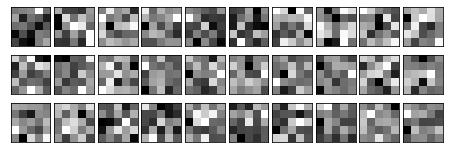

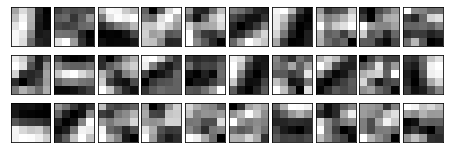

In [6]:
def filter_show(filters, nx=10):
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.0, wspace=0.1)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# Weight after random initialization
filter_show(network.params['W1'])

# Weight after learning
network.load_params("demo_code/params.pkl")
filter_show(network.params['W1'])

As can be seen from the figure above, the filter before learning is initialized randomly, and there is no rule to follow. However, the learned filter becomes a regular image. Some filters respond to edges in the vertical direction, and some filters respond to edges in the horizontal direction.

The above results are for the first convolutional layer. The convolutional layer of the first layer extracts "low-level" information such as edges or patches. In a stacked CNN, what kind of information will be extracted in each layer? According to research related to visualization of deep learning, as the level deepens, the extracted information becomes more and more abstract.

The figure below shows an 8-layer CNN for general object recognition. The name of this network structure is AlexNet which will be introduced in the next section. The AlexNet network structure stacks multiple convolutional layers and pooling layers, and finally outputs the result through a fully connected layer.

![img](images/chapter13/CNN_visual.jpg)

As the convolutional neural network deepens, the extracted information becomes more complex and abstract. The first layer responds to simple edges, the next layers respond to textures, and the later layers respond to more complex object parts. In other words, as the level deepens, neurons change from simple shapes to "high-level" information.